<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Model Interpretability

_How to interpret models and visualize feature importance._

_Author: Noelle B. (DEN)_

---

In [62]:
# imports
import pandas as pd
import numpy as np
# model imports
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
# data imports
from sklearn.datasets import load_boston, load_breast_cancer
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import graphviz
from IPython.display import Image
%matplotlib inline

In [63]:
# Get data
# load in boston housing price dataset for regression
boston = load_boston()
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)
bostondf['price'] = boston.target*1000 #prices are in 1000's of dollars
bostondf.head()

#load in breast cancer dataset for classification
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df['type'] = breast_cancer.target

# split into x and y for modeling
X_boston = bostondf.drop(columns='price')
y_boston = bostondf['price']
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, random_state = 42)
X_bc = breast_cancer_df.drop(columns='type')
y_bc = breast_cancer_df['type']
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state = 42)

## Linear Regression

In [3]:
# instantiate model
lr = LinearRegression()
# fit model
lr.fit(X_train_boston, y_train_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# view coefficients
lr.coef_

array([-1.28322638e+02,  2.95517751e+01,  4.88590934e+01,  2.77350326e+03,
       -1.62388292e+04,  4.36875476e+03, -9.24808158e+00, -1.40086668e+03,
        2.57761243e+02, -9.95694820e+00, -9.23122944e+02,  1.31854199e+01,
       -5.17639519e+02])

In [4]:
# Get feature importances

# save coefficients
weights = lr.coef_.ravel()
# save variable names
feature_names = X_boston.columns.values
# save coefficients and variable names as dataframe
lr_features = pd.DataFrame({'feature_names': feature_names, 'weights': weights, 'absolute_weights': np.abs(weights)})
# sort by absolute weights
lr_features.sort_values(by='absolute_weights', inplace=True, ascending=False )

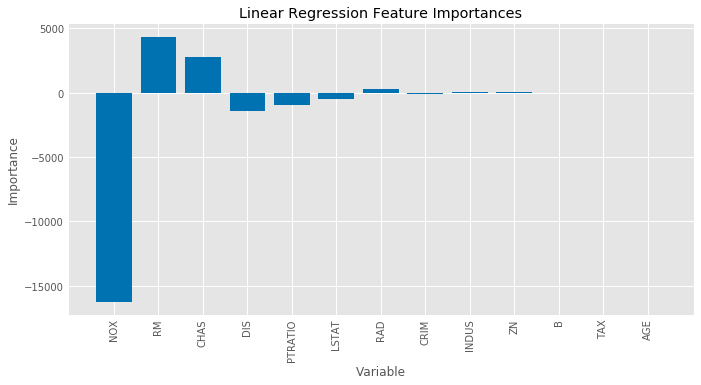

In [80]:
#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

plt.figure(figsize=(10,5))                               
plt.style.use('seaborn-colorblind')                              
plt.bar(lr_features['feature_names'], lr_features['weights'], orientation = 'vertical')
plt.xticks(lr_features['feature_names'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Linear Regression Feature Importances');

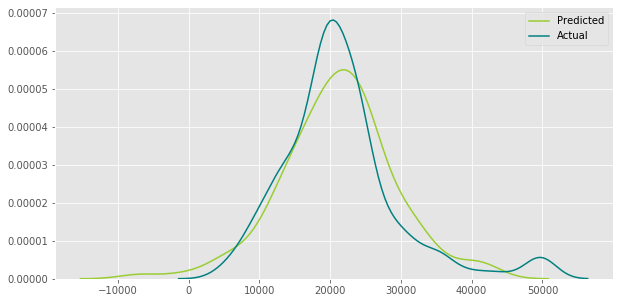

In [6]:
#  Distribution of Predicted vs. Actual
plt.figure(figsize=(10,5))

sns.kdeplot(lr.predict(X_test_boston), label="Predicted", color="yellowgreen")
sns.kdeplot(y_test_boston, label="Actual", color="teal")

plt.legend()
plt.show()

## Decision Trees

In [83]:
# instantiate model
decision_tree = DecisionTreeClassifier(max_depth = 3)
# fit model
decision_tree_fit = decision_tree.fit(X_train_bc, y_train_bc)

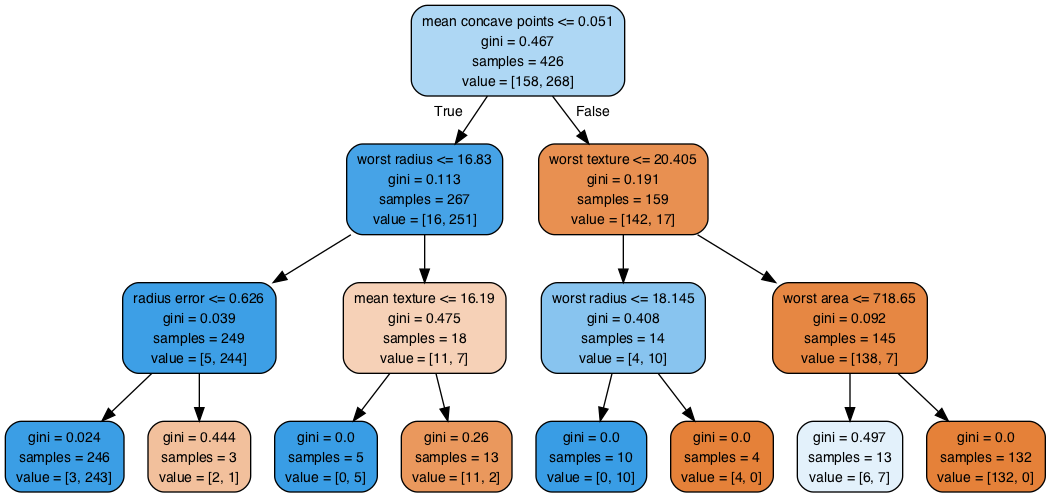

In [84]:
# Display the tree

# get list of column names
feature_list = list(X_bc.columns)
# display tree
export_graphviz(decision_tree_fit, out_file = 'tree.dot', feature_names = feature_list, 
                rounded = True, filled = True)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

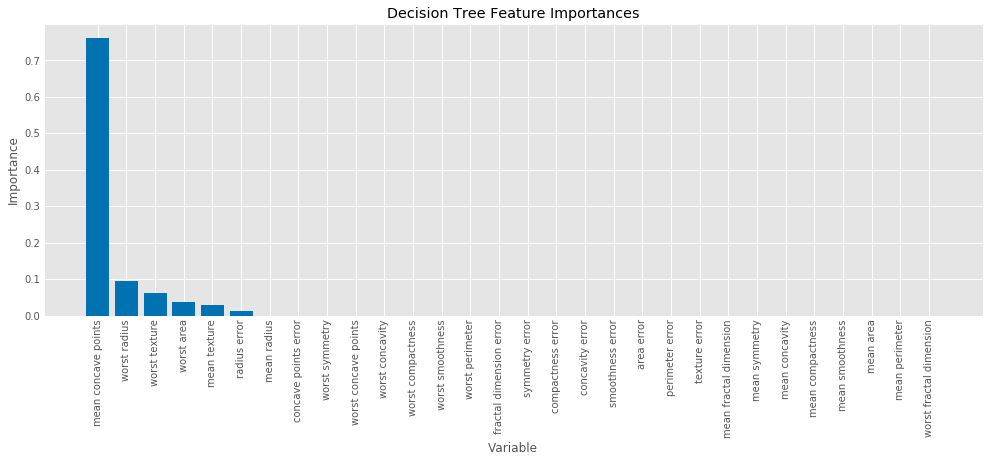

In [91]:
# Decision tree feature importance
# save coefficients
weights = decision_tree_fit.feature_importances_.ravel()
# save variable names
feature_names = X_bc.columns.values
# save as dataframe
feature_importances_dt = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
# sort by absolute weight
feature_importances_dt.sort_values(by='absolute_weights', inplace=True, ascending=False )

# plot top features
plt.figure(figsize=(15,5))                               
plt.style.use('seaborn-colorblind')                              
plt.bar(feature_importances_dt['feature_names'], feature_importances_dt['weights'], orientation = 'vertical')
plt.xticks(feature_importances_dt['feature_names'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Decision Tree Feature Importances');

In [ ]:
# Just top 5
# Decision tree feature importance
# save coefficients
weights = decision_tree_fit.feature_importances_.ravel()
# save variable names
feature_names = X_bc.columns.values
# save as dataframe
feature_importances_dt = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
# sort by absolute weight
feature_importances_dt.sort_values(by='absolute_weights', inplace=True, ascending=False )

# plot top features
plt.figure(figsize=(15,5))                               
plt.style.use('seaborn-colorblind')                              
plt.bar(feature_importances_dt['feature_names'][:5], feature_importances_dt['weights'][:5], orientation = 'vertical')
plt.xticks(feature_importances_dt['feature_names'][:5], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Decision Tree Feature Importances');

In [92]:
sum(weights)

1.0

This importance value is the "`gini importance` or `mean decrease impurity` and is defined as the total decrease in node impurity" [source](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined).

"The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance" [source](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined).

[Read More](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#varimp)

## Random Forest

In [88]:
# instantiate model
rf = RandomForestClassifier(n_estimators = 10, max_depth = 3)
# fit model and save as variable
rf_fit = rf.fit(X_train_bc, y_train_bc)

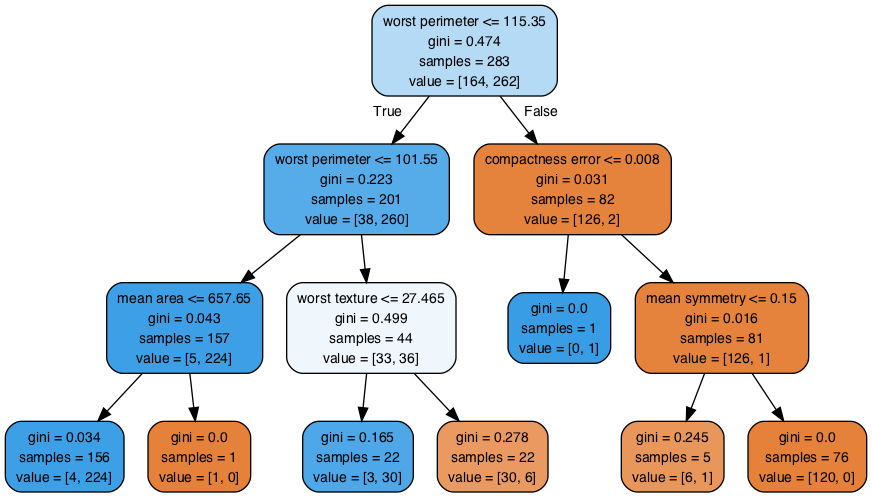

In [89]:
# visualize one tree
# Extract one random tree from the forest
tree = rf_fit.estimators_[5]
# Save the tree as a png image
feature_list = list(X_bc.columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, 
                rounded = True, filled = True)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

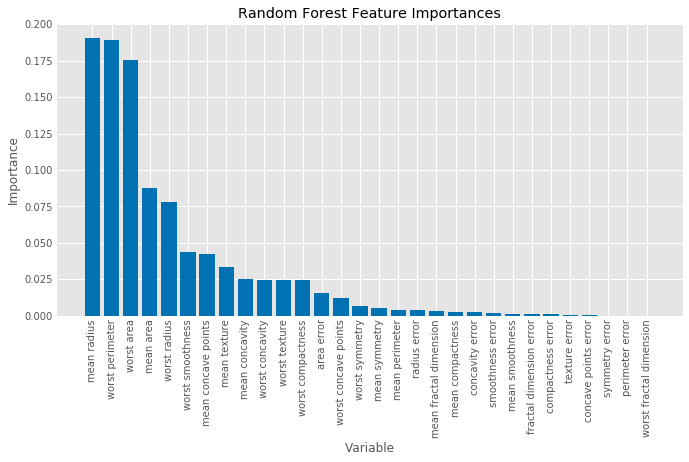

In [90]:
# RF feature importance
# save feature importances
weights = rf.feature_importances_.ravel()
# save variable names
feature_names = X_bc.columns.values
# save as dataframe
feature_importances_rf = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
# sort by absolute weights
feature_importances_rf.sort_values(by='absolute_weights', inplace=True, ascending=False )

# plot top features
plt.figure(figsize=(10,5))                               
plt.style.use('seaborn-colorblind')                              
plt.bar(feature_importances_rf['feature_names'], feature_importances_rf['weights'], orientation = 'vertical')
plt.xticks(feature_importances_rf['feature_names'], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Random Forest Feature Importances');